In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# Returns

- Return: $$R_{t, t+1} = \frac{P_{t+1} - P_t}{P_t}$$
- Or, in the "+1" format: $$R_{t, t+1} = \frac{P_{t+1}}{P_t}$$
  - These are easier to compound, just multiply them
- You should think of "-20%" and "0.8" as identical
- For the *total* return, add in the dividends: $$R_{t, t+1} = \frac{P_{t+1} + D_{t,t+1} - P_t}{P_t}$$
- **Annualizing** a monthly return of 1%: $$1.01^{12} - 1 = 12.68\%$$

In [2]:
prices = pd.DataFrame({
    "BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
    "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]
})

In [3]:
prices.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [4]:
# This doesn't work because pandas considers the row index!
prices.iloc[1:] / prices.iloc[:-1]

,BLUE,ORANGE
0,NaN,NaN
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,NaN,NaN


In [5]:
# Use .values just once to keep the result a DF
prices.iloc[1:].values / prices.iloc[:-1] - 1

,BLUE,ORANGE
0,0.024138,0.039400
1,-0.022447,-0.033394
2,-0.032147,0.082166
3,0.035587,0.044866


In [6]:
prices / prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [7]:
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [8]:
prices = pd.read_csv('../data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [9]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


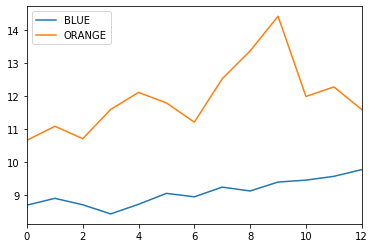

In [10]:
prices.plot()

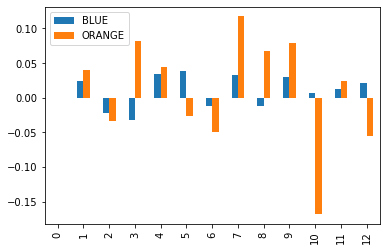

In [11]:
returns.plot.bar()

In [12]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [13]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

### Compound the returns

Even though the **arithmetic mean** return is 0.01 for both series, the total return is lower for the more volatile series:

In [14]:
np.prod(returns + 1) - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

### Annualizing a monthly 1% return

In [15]:
(1 + 0.01) ** 12 - 1

0.12682503013196977

### Annualizing a daily 0.1% return

(there are roughly 252 trading days in a year)

In [16]:
(1 + 0.001) ** 252 - 1

0.28643404437615216

# Risk

- Volatility: usually the standard deviation
- We can't compare the vola of daily data with the vola of monthly data
  - $\sigma_{ann} = \sigma_p \sqrt{p}$
  - e.g. if daily vola is 0.1%, then annualized volatility is $0.001 \cdot \sqrt{252} = 0.0158 = 1.58\%$
  - This implies that the annualized vola is always greater than e.g. the monthly vola.
  
  
### Risk adjusted return measures

- You could divide the return by the volatility
- A better measure is to divide the **excess** return (above the risk free rate, i.e. US Treasury Bills 30 days)
  - This is the **Sharpe ratio**: (Return minus risk free rate) / Volatility
    
$$S = \frac{R_p - R_f}{\sigma_p}$$

- example conclusion: Small Caps give you a better risk adjusted return than Large Caps

In [17]:
returns.dropna()  # drop row 0

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [18]:
# Volatility based on monthly data
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [19]:
# Annualized volatility
returns.std() * np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

# Lab session - Risk adjusted returns

In [20]:
# caps = pd.read_csv('../data/Portfolios_Formed_on_ME_monthly_EW.csv')  # original course data
caps = pd.read_csv('../data/Portfolios_Formed_on_ME.CSV')  # my downloaded data

caps = caps.rename(
    columns={'Unnamed: 0': 'date'}
).drop('<= 0', axis=1)

caps['date'] = pd.to_datetime(caps['date'].astype(str) + '01')
caps = caps.set_index('date')
caps.index = caps.index.to_period('M')
caps.head(3)

,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
date,,,,,,,,,,,,,,,,,,
1926-07,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
1926-08,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
1926-09,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67


This data set contains monthly returns for market cap groups.

Within the "universe" of US stocks. From [Ken French's website](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html). You can download an up-to-date CSV there, but it's not formatted well, you have to manually extract your data frame (there are 2+ tables stacked on top of each other within one CSV)

The market is split up into three, five, and ten groups and the cells contain their monthly return.
For example, the first three columns split the market up in the smallest 30%, the middle 40%, and the largest 30%. Within the "Hi 30" group, all companies are equally weighted.

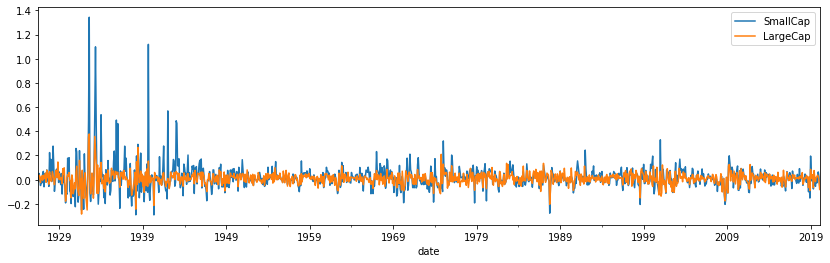

In [21]:
returns = caps[['Lo 10', 'Hi 10']].rename(columns={'Lo 10': 'SmallCap', 'Hi 10': 'LargeCap'})
returns /= 100
returns.plot(figsize=(14,4))

In [22]:
# Annualized returns, naive way (these numbers are wrong)
returns.mean() * 12

SmallCap    0.209679
LargeCap    0.107180
dtype: float64

In [23]:
n_months = returns.shape[0]
ann_return = (1 + returns).prod() ** (12/n_months) - 1
ann_return

SmallCap    0.166194
LargeCap    0.093687
dtype: float64

In the above cell, we find that the annualized average return for small caps is around 16%,
and for large caps it's 9%.

This is for an **equally** weighted portfolio though! For a **value** weighted portfolio the "bigger" small caps make up a larger share, and the performance drops again. A value weighted small caps portfolio returns around 11.2%, not 16%! (you can download both these versions on Ken French's website)

In [24]:
# Annualized std
ann_vola = returns.std() * np.sqrt(12)
ann_vola

SmallCap    0.366772
LargeCap    0.186350
dtype: float64

In [25]:
# Naive return per risk (without correcting for risk-free rate):
ann_return / ann_vola

SmallCap    0.453126
LargeCap    0.502746
dtype: float64

In [26]:
# Sharpe Ratio
risk_free_rate = 0.03  # but the proper way is to take the time series of the (varying) risk free rate
(ann_return - risk_free_rate) / ann_vola

SmallCap    0.371331
LargeCap    0.341759
dtype: float64

# Per-decade returns

In [27]:
(1 + returns).prod() ** (1/n_months) - 1

SmallCap    0.012895
LargeCap    0.007491
dtype: float64

In [28]:
from scipy.stats import gmean
gmean(1+returns) - 1

array([0.01289452, 0.00749078])

In [29]:
def geom_mean(df, scale=1):
    n_rows = df.shape[0]
    return (1 + df).prod() ** (scale/n_rows) - 1

In [30]:
def decade(date):
    return(date.year // 10 * 10)

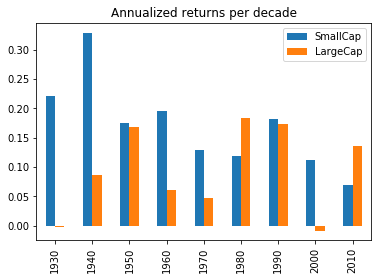

In [31]:
returns['1930':'2019'].groupby(decade).apply(geom_mean, scale=12).plot.bar(title='Annualized returns per decade')

## Growth of \\$1 over 90 years (a *wealth index*)

In [67]:
wealth_index = (1 + returns).cumprod()

- **Returns** refer to a **period**, while **wealth** refers to a **date**.
- Thus, a returns data frame should have a **PeriodIndex**, while a wealth data frame should have a **timestamp index**
- A PeriodIndex makes e.g. resampling easier.

In [68]:
wealth_index.index = pd.to_datetime(wealth_index.index.to_timestamp(how='end').date)

In [69]:
wealth_index.iloc[[0, -1], :]

,SmallCap,LargeCap
1926-07-31,9.855000e-01,1.032900
2020-02-29,1.795503e+06,4395.138171


So, \\$1 invested on 1926-06-01 would grow into \\$4395 if put into LargeCaps, and \\$1_795_503 if put into (equally weighted) SmallCaps!

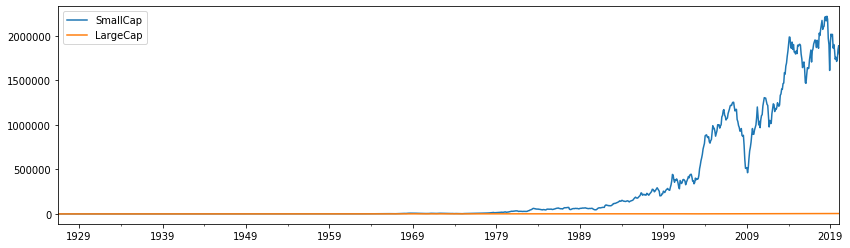

In [70]:
wealth_index.plot(figsize=(14, 4))

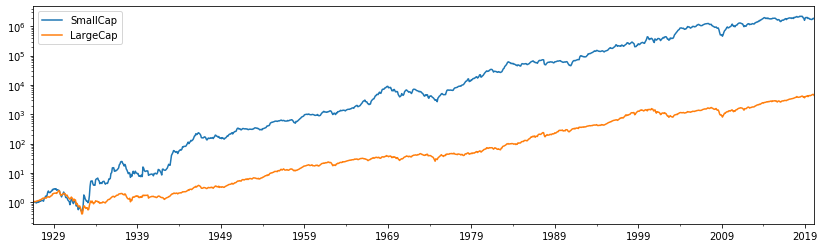

In [71]:
wealth_index.plot(logy=True, figsize=(14, 4))

# Measuring Max Drawdown

- The std is symmetric. You'd consider a huge gain a "risk", but it's (usually) good
- The real risk is to lose money
- Another measure: *max drawdown*: The maximum loss from the highest point to the lowest. The **worst possible return** if you buy at the peak and sell at the trough
  - It's not a mathematically/logically attractive measure, but it's nice because it's **consistent with our behavioral bias**: You've "had" that much money, and "lost" it.
- Problems:
  - Very outlier-sensitive. The measure is defined by only two points in your time series
  - Very sensitive to the granularity: A large daily drawdown might disappear in monthly data. Per-decade drawdown can even be zero.
- Other more robust measures: VAR or CVAR (upcoming lectures)

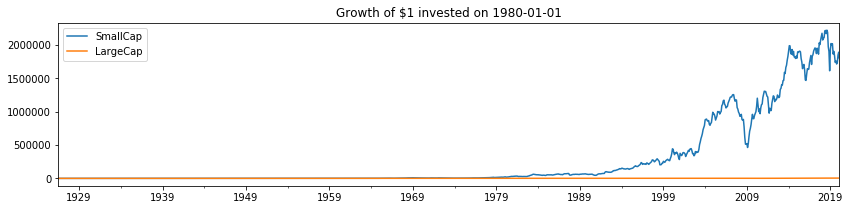

In [72]:
wealth_index.plot(figsize=(14, 3), title='Growth of $1 invested on 1980-01-01')

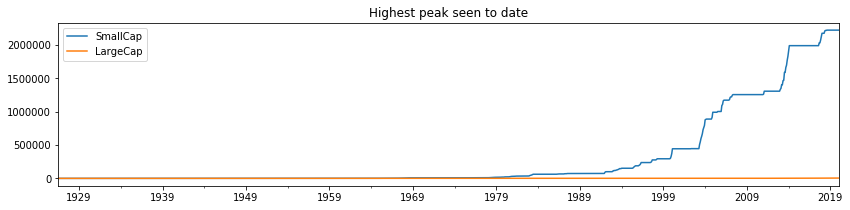

In [73]:
cummax = wealth_index.cummax()
cummax.plot(figsize=(14, 3), title='Highest peak seen to date')

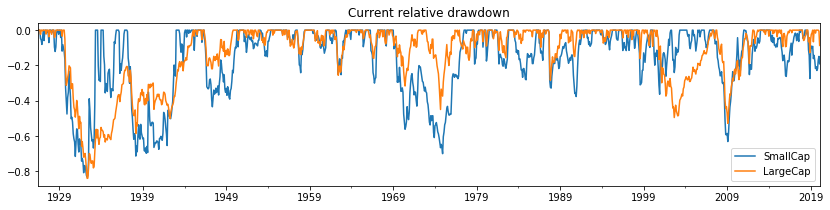

In [74]:
drawdown = (wealth_index - cummax) / cummax
drawdown.plot(figsize=(14, 3), title='Current relative drawdown')

- Sheesh, after 1929 LargeCaps needed 15 years (until 1944) to reach their old all-time high!
- Weird that during WWII the stock market was soaring

In [75]:
drawdown.min()

SmallCap   -0.833001
LargeCap   -0.840038
dtype: float64

In [76]:
drawdown.idxmin()

SmallCap   1932-05-31
LargeCap   1932-05-31
dtype: datetime64[ns]

### Get the maximum drawdown since 1975 and show when it happened

In [79]:
drawdown['1975':].min()

SmallCap   -0.631317
LargeCap   -0.528095
dtype: float64

In [80]:
drawdown['1975':].idxmin()

SmallCap   2009-02-28
LargeCap   2009-02-28
dtype: datetime64[ns]